In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from icecream import ic

import numpy as np
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential

from src.trainer.evidential import TrainerEvidential, TrainerEvidentialUEO
import src.trainer.evidential as evidential

from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2
from src import metrics as _metric
from src.trainer.evidential import getMassFcn2D

In [3]:
import pickle
# filename = 'log_evidential_dirichletplot1.pkl'
filenames = [
    'log_evidential_dirichletplot1.pkl',
    'log.pkl'
             ]

results = []
for filename in filenames:
    with open(filename, 'rb') as handle:
        results.extend(pickle.load(handle))
        print(len(results))
# print(results)
# print(len(results))

[{'other_uncertainty_metrics': {'sUEO': 0.3845722890780702, 'ece_score': 0}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': 0.0, 'alpha': array([132.42505,   1.     ,   1.     ], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': 0.0, 'alpha': array([1., 1., 1.], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': 0.0, 'alpha': array([1., 1., 1.], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': 1.0, 'alpha': array([ 1.     , 49.57395,  1.     ], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': 0.0, 'alpha': array([1.       , 1.5210117, 1.       ], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': 0.0, 'alpha': array([1., 1., 1.], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.88740774]), 'recall_L': array([0.94878267]), 'recall_Ltotal

In [4]:
results

[{'other_uncertainty_metrics': {'sUEO': 0.3845722890780702, 'ece_score': 0},
  'snippet_poi_results': [{'snippet_id': 0,
    'coords': [550, 550],
    'reference': 0,
    'predicted': 0.0,
    'alpha': array([132.42505,   1.     ,   1.     ], dtype=float32)},
   {'snippet_id': 0,
    'coords': [210, 610],
    'reference': 1,
    'predicted': 0.0,
    'alpha': array([1., 1., 1.], dtype=float32)},
   {'snippet_id': 0,
    'coords': [207, 617],
    'reference': 1,
    'predicted': 0.0,
    'alpha': array([1., 1., 1.], dtype=float32)},
   {'snippet_id': 0,
    'coords': [800, 200],
    'reference': 1,
    'predicted': 1.0,
    'alpha': array([ 1.     , 49.57395,  1.     ], dtype=float32)},
   {'snippet_id': 1,
    'coords': [550, 115],
    'reference': 1,
    'predicted': 0.0,
    'alpha': array([1.       , 1.5210117, 1.       ], dtype=float32)},
   {'snippet_id': 1,
    'coords': [430, 950],
    'reference': 0,
    'predicted': 0.0,
    'alpha': array([1., 1., 1.], dtype=float32)}],
  'un

idx: 0, alpha: [132.42505   1.        1.     ]
idx: 1, alpha: [136.90787   1.        1.     ]
idx: 2, alpha: [168.6423   1.       1.    ]
idx: 3, alpha: [445.66052   1.        1.     ]
idx: 4, alpha: [11.179253  1.        1.      ]
idx: 5, alpha: [108.59968   1.        1.     ]
idx: 0, alpha: [1. 1. 1.]
idx: 1, alpha: [1. 1. 1.]
idx: 2, alpha: [1. 1. 1.]
idx: 3, alpha: [1. 1. 1.]
idx: 4, alpha: [1.        4.3864956 1.       ]
idx: 5, alpha: [1. 1. 1.]
idx: 0, alpha: [1. 1. 1.]
idx: 1, alpha: [1. 1. 1.]
idx: 2, alpha: [1. 1. 1.]
idx: 3, alpha: [1. 1. 1.]
idx: 4, alpha: [1. 1. 1.]
idx: 5, alpha: [1. 1. 1.]
idx: 0, alpha: [ 1.      49.57395  1.     ]
idx: 1, alpha: [1.      5.56545 1.     ]
idx: 2, alpha: [1.        7.0894217 1.       ]
idx: 3, alpha: [ 1.      36.08136  1.     ]
idx: 4, alpha: [ 1.       13.282934  1.      ]
idx: 5, alpha: [ 1.      31.63057  1.     ]
idx: 0, alpha: [1.        1.5210117 1.       ]
idx: 1, alpha: [1. 1. 1.]
idx: 2, alpha: [1. 1. 1.]
idx: 3, alpha: [1. 1. 

d:\Jorge\deforestation_uncertainty\src\trainer\evidential.py:56: RuntimeWarning: invalid value encountered in double_scalars
  return self._coef * np.multiply.reduce([xx ** (aa - 1)


idx: 4, alpha: [ 1.       12.487554  1.      ]
idx: 5, alpha: [1.        1.1691334 1.       ]


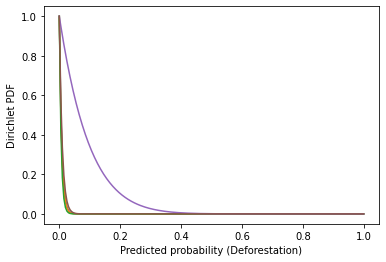

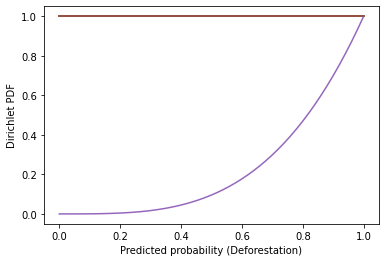

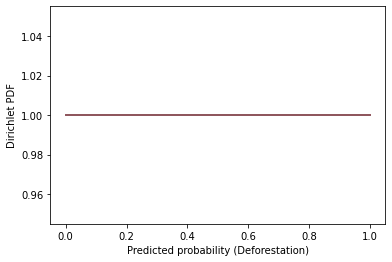

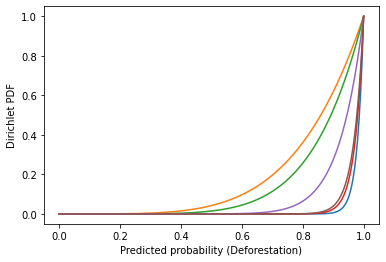

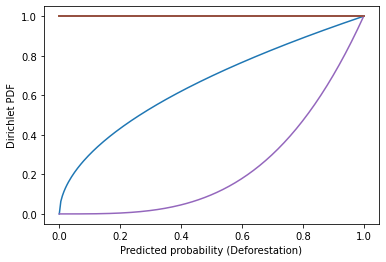

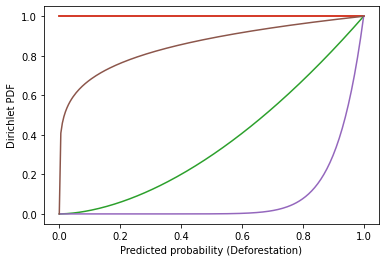

In [5]:

import matplotlib.pyplot as plt
for poi_id in range(6):
    plt.figure()
        
    for idx, result in enumerate(results):
        print("idx: {}, alpha: {}".format(idx, result['snippet_poi_results'][poi_id]['alpha']))
        # plt.figure()
        getMassFcn2D(result['snippet_poi_results'][poi_id]['alpha'], normalize_pvals=True)